In [1]:
using KissABC

In [2]:
include("run_remotely.jl")

run_batch (generic function with 1 method)

In [3]:
function cost(params)
    pdict = Dict(
        "p-drop-contact" => params[1], 
#        "speed-expl-stay" => params[2], 
#        "speed-expl-move" => params[3], 
        "p-info-contacts" => params[2], 
        "p-transfer-info" => params[3])
#        "error" => params[6], 
#        "error-risk" => params[7], 
#        "error-frict" => params[8], 
#        "risk-scale" => params[9], 
#        "p-notice-death-c" => params[10], 
#        "p-notice-death-o" => params[11], 
#        "speed-risk-indir" => params[12], 
#        "speed-risk-obs" => params[13], 
#        "speed-expl-risk" => params[14], 
#        "path-penalty-risk" => params[15])
    args = " -m ../map_med1.json -s ../mediterranean '--wait 10 --warmup 100 --int 0.01 0.077 0.153 0.428 0.389 --risks 0.01 0.023 0.020 0.029 0.048'  -t 500"
    for (k, v) in pdict
        args *= " --$k $v" 
    end
    
    args *= " --rand-seed-sim $(rand(1:100000)) --rand-seed-world $(rand(1:100000))"
    
    xdirs = [readdir("incoming"); readdir("running"); readdir("done")]
    filter!(x -> startswith(x, "x"), xdirs)
    mx = 1
    for dir in xdirs
        m = match(r"x([0-9]+)_", dir)
        if m == nothing 
            continue
        end
        n = parse(Int, m.captures[1])
        if mx <= n
            mx = n+1
        end
    end
    
    prefix = "x$(mx)_$(Threads.threadid())_"
    server = "sotonhpc"
    dir = "Science/southampon/runs/mediterranean"
    
    results = run_batch(server, dir, prefix, [args])[1]
    
    arrivals = [0.657941144053786, 0.207848228494849, 0.599476123312513]
    mort = [0.022736973763885, 0.019768432868398, 0.028785488958991, 0.047819332348149]
    interc = [1.43020016842651, 0.884092762025546, 0.525283057533685]
    
    d1 = sqrt(sum((arrivals .- results[1]) .^ 2))
    d2 = sqrt(sum((mort .- results[2]) .^ 2))
    d3 = sqrt(sum((interc .- results[3]) .^ 2))
    
    d1 + d2 * 10 + d3
end
    

cost (generic function with 1 method)

In [ ]:
#res = cost((0.1, 1.0, 1.0))

In [4]:
prior = Factored(Uniform(0, 1), Uniform(0, 1), Uniform(0, 1))

Factored{3}(p=(Uniform{Float64}(a=0.0, b=1.0), Uniform{Float64}(a=0.0, b=1.0), Uniform{Float64}(a=0.0, b=1.0)))

In [5]:
results = smc(prior, cost, alpha=0.6, parallel=true, verbose=true)

created x2_991_1_359016649445174152
created x4_913_1_13238858799337881427
created x1_10_1_8864617561734769097
created x5_967_1_15861701470116812543
created x5_932_1_3730020951416377143
created x5_836_1_17122596247302933246
created x1_920_1_11539512789462316851
created x6_993_1_12455224990241294556
created x6_973_1_10081974195795785250
created x1_997_1_13307266055255149009
created x6_3_1_3563680003643289379
created x6_935_1_13031195743695580349
created x7_988_1_16915607397245176758
created x6_999_1_6451128630552404620
created x6_981_1_11449842461739561528
created x8_940_1_16411739084936758931
created x8_982_1_2478543183211321161
created x6_1000_1_15656937248089981757
created x7_917_1_7461958076857011239
created x9_15_1_7729490811697573196
created x10_910_1_5543880899385616970
created x11_14_1_10552761317502202748
created x1_977_1_5666771395900510386
created x12_947_1_7042383057212114002
created x1_11_1_14760441394459592585
created x13_955_1_12833613719235374085
created x12_985_1_1390332

created x62_28_1_17736042213336359922
created x62_17_1_14844303359747491202
created x62_7_1_14680506731620972285
created x62_14_1_12534503455849636543
created x62_24_1_2881005721952742539
created x62_27_1_11613721397074423857
created x64_1_1_17191904569706676019
created x62_29_1_8263464225784789867
created x62_31_1_6012757325112656704
created x63_37_1_10412943620441729740
created x63_45_1_8823390457208282630
created x62_12_1_2604715114390472447
created x63_50_1_8579978094700622854
created x62_3_1_14212340099730512336
created x63_49_1_211178146756285239
created x63_40_1_10151836355679051930
created x63_39_1_7145831067714886895
created x63_36_1_15253244577674706172
created x62_8_1_868883789405170607
created x62_11_1_7755593492445163621
created x63_43_1_2754861671723556976
created x62_22_1_5437501480371650561
created x63_38_1_8129065411624263760
created x62_20_1_17047705910975334137
created x62_10_1_15119432519118521286
created x63_46_1_14452460779843523014
(iteration, ϵ, dest, target) = 

(iteration, ϵ, dest, target) = (7, 4.115408516939307, 72.00000000000001, 60.0)
created x77_9_1_3760841030972204459
created x77_36_1_4851230351968440980
created x78_26_1_6327548838449199996
created x78_27_1_13356777842232793872
created x77_10_1_6654634850748248624
created x77_4_1_18377945384054906424
created x77_18_1_14602420744216248012
created x78_31_1_12940533978715236748
created x77_5_1_12485669857226950474
created x77_30_1_7049258485383642858
created x77_11_1_16696165923216579749
created x77_25_1_752744380495158900
created x77_8_1_11551590038272051591
created x78_32_1_2593851934056414335
created x77_23_1_9455110968055261812
created x77_19_1_4408017310406328323
created x77_28_1_16466617783179237654
created x77_2_1_7754696707501966281
created x78_29_1_8839911559653728027
created x77_17_1_5612259642458458887
created x77_14_1_9325371296032342363
created x77_3_1_11132586771679550714
created x77_6_1_15579748971329645265
created x77_24_1_14855460555018538577
created x79_1_1_46654919211149

(P = Particles{Float64, 72}[0.488 ± 0.25, 0.487 ± 0.21, 0.318 ± 0.24], W = 0.0139, ϵ = 4.115408516939307)

In [6]:
results

(P = Particles{Float64, 72}[0.488 ± 0.25, 0.487 ± 0.21, 0.318 ± 0.24], W = 0.0139, ϵ = 4.115408516939307)

In [32]:
for i in 1:10
    println(results.P[1].particles[i], " ", results.P[2].particles[i], " ", results.P[3].particles[i], " ")
end

0.3223638310445608 0.4450148933174924 0.09297409936403232 
0.3223638310445608 0.4450148933174924 0.09297409936403232 
0.3223638310445608 0.4450148933174924 0.09297409936403232 
0.3223638310445608 0.4450148933174924 0.09297409936403232 
0.8249844905123129 0.6795843324593243 0.6225671450960883 
0.8249844905123129 0.6795843324593243 0.6225671450960883 
0.8918810056609078 0.7354159140853498 0.6539417304214517 
0.8918810056609078 0.7354159140853498 0.6539417304214517 
0.27127275088745484 0.4849183711471188 0.11221818350449397 
0.27127275088745484 0.4849183711471188 0.11221818350449397 


In [33]:
using JSON

0.488 ± 0.25


In [9]:
using Plots

In [46]:
plotly()

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /home/martin/.julia/packages/Plots/g581z/src/backends.jl:372


Plots.PlotlyBackend()

In [47]:
scatter(results.P[1].particles, results.P[2].particles, results.P[3].particles)

<!DOCTYPE html>
 
 
 Plots.jl

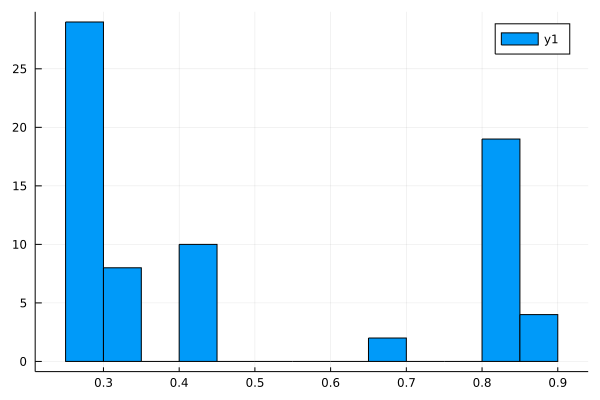

In [42]:
histogram(results.P[1].particles, bins=20)

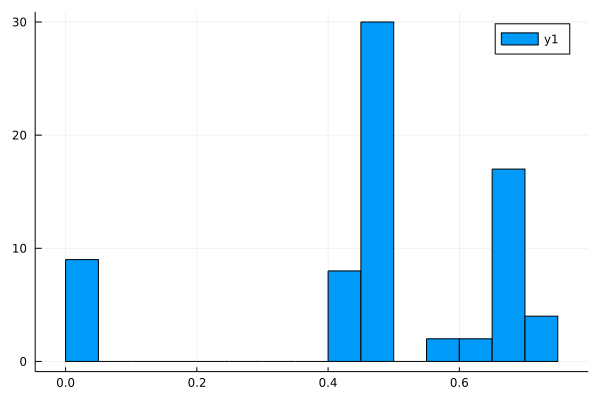

In [43]:
histogram(results.P[2].particles, bins=20)

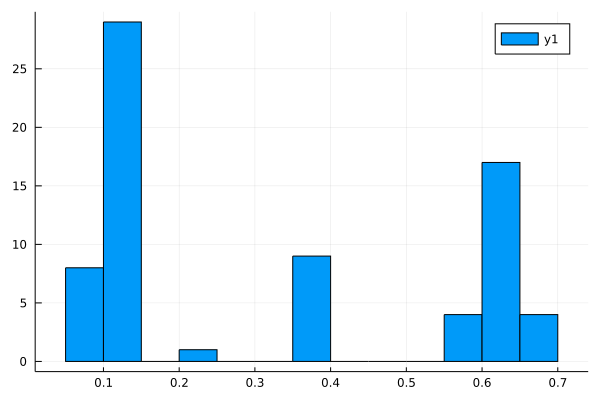

In [44]:
histogram(results.P[3].particles, bins=20)